In [5]:
import scanpy as sc
import pandas as pd
from matplotlib import pylab
import random
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import itertools
import numpy as np
import random
import anndata as ad
from scipy import sparse
import os

from matplotlib.colors import TwoSlopeNorm

import scanpy.external as sce

In [2]:
import anndata

In [3]:
anndata.__version__

'0.8.0'

In [6]:
sc.settings.set_figure_params(dpi=100, facecolor='white', dpi_save=500)
pylab.rcParams['figure.figsize'] = (9, 9)


outDir = "./outdir/Braun"
if not os.path.exists(outDir):
    os.makedirs(outDir)


# Poliudakis ref

In [7]:
Poliudakis = sc.read_h5ad("./data/Geschwind_atlas.h5ad")
Poliudakis.var_names_make_unique()

# Linnarsson

In [8]:
Linn = sc.read_h5ad("./data/human_dev_GRCh38-3.0.0.h5ad")
Linn.obs
md = pd.read_excel("./data/table_S1.xlsx")
md["sample_id"] = md["Sample_ID"]
Linn.obs["Sample_ID"] = Linn.obs.sample_id.str.split("'", expand=True)[1]
Linn.obs["indexer"] = Linn.obs.index.tolist()
Linn.obs = Linn.obs.merge(md.drop_duplicates("Sample_ID"), on="Sample_ID", how="left").set_index("indexer")
Linn = Linn[Linn.obs["Age"] > 7 ]
#Linn = Linn[Linn.obs["Age"] > 7 ]
Linn.var_names = Linn.var["Gene"].astype(str)
Linn.obs = Linn.obs[[i for i in Linn.obs.columns.tolist() if "Unnamed" not in i]]
Linn






Linn.var_names_make_unique()
Linn.var_names.name = None



/group/testa/Users/davide.castaldi/Polaroid_publication_revisions/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:896: FutureWarning: X.dtype being converted to np.float32 from int16. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  self._set_dim_index(names, "var")


In [9]:
Linn.obs.Subregion = Linn.obs.Subregion.str.split("'",expand=True)[1]
Linn.obs.Region = Linn.obs.Region.str.split("'",expand=True)[1]

In [10]:
pd.crosstab(Linn.obs.Subregion,Linn.obs.Age)

Age                7.5    8.0    8.1    8.5    9.2    9.5    10.0   11.5  \
Subregion                                                                  
Cerebellum            0   9336   4157  23162      0      0      0  12507   
Cortex                0  18546      0      0  22850  15788  51372  46401   
Forebrain         38870      0      0  50807  23917      0  37487      0   
Hindbrain             0      0      0      0      0      0      0      0   
Hippocampus           0      0      0      0      0      0      0      0   
Hypothalamus          0   5504  13407      0      0      0      0      0   
Medulla               0   8354      0   7131  15381      0      0      0   
Midbrain              0  26763      0  20862   8886      0      0  11133   
Midbrain dorsal       0      0      0      0      0      0      0      0   
Midbrain ventral      0  12489      0      0      0      0      0      0   
Pons                  0   9326      0   3085  15856      0      0   6968   
Striatum              0      0      0      0      0      0      0      0   
Subcortex             0  11804      0  14179      0  12859      0  25951   
Thalamus              0  24438  13909      0      0      0      0      0   

Age                12.0   13.0   14.0  
Subregion                              
Cerebellum        10548      0  11021  
Cortex            18668  21012  20441  
Forebrain             0      0      0  
Hindbrain         13782      0      0  
Hippocampus       10276      0   5329  
Hypothalamus          0      0  10627  
Medulla               0   3891      0  
Midbrain           4463      0      0  
Midbrain dorsal       0      0   6175  
Midbrain ventral      0      0   4311  
Pons                  0   5303      0  
Striatum              0      0  13184  
Subcortex         28814   8761      0  
Thalamus              0      0   6692

In [11]:
pd.crosstab(Linn.obs.Region,Linn.obs.Age)

Age             7.5    8.0    8.1    8.5    9.2    9.5    10.0   11.5   12.0  \
Region                                                                         
Cerebellum         0   9336   4157  23162      0      0      0  12507  10548   
Diencephalon       0  29942  27316      0      0      0      0      0      0   
Forebrain      38870  11804      0  64986  23917  12859  37487  25951  28814   
Hindbrain          0      0      0      0      0      0      0      0  13782   
Medulla            0   8354      0   7131  15381      0      0      0      0   
Midbrain           0  39252      0  20862   8886      0      0  11133   4463   
Pons               0   9326      0   3085  15856      0      0   6968      0   
Telencephalon      0  18546      0      0  22850  15788  51372  46401  28944   

Age             13.0   14.0  
Region                       
Cerebellum         0  11021  
Diencephalon       0  17319  
Forebrain       8761      0  
Hindbrain          0      0  
Medulla         3891      0  
Midbrain           0  10486  
Pons            5303      0  
Telencephalon  21012  38954

In [12]:
# remove v2 chemistry (main batch soruce is 10x kit type)
Linn = Linn[Linn.obs["Chemistry"] == "v3"]

In [13]:
pd.crosstab(Linn.obs.Subregion,Linn.obs.Age)

Age                8.5    11.5   12.0   13.0   14.0
Subregion                                          
Cerebellum        23162  12507  10548      0  11021
Cortex                0  46401  18668  21012  20441
Hindbrain             0      0  13782      0      0
Hippocampus           0      0  10276      0   5329
Hypothalamus          0      0      0      0  10627
Medulla            7131      0      0   3891      0
Midbrain          20862  11133   4463      0      0
Midbrain dorsal       0      0      0      0   6175
Midbrain ventral      0      0      0      0   4311
Pons               3085   6968      0   5303      0
Striatum              0      0      0      0  13184
Subcortex         14179  25951  28814   8761      0
Thalamus              0      0      0      0   6692

In [14]:
pd.crosstab(Linn.obs.Region,Linn.obs.Age)

Age             8.5    11.5   12.0   13.0   14.0
Region                                          
Cerebellum     23162  12507  10548      0  11021
Diencephalon       0      0      0      0  17319
Forebrain      14179  25951  28814   8761      0
Hindbrain          0      0  13782      0      0
Medulla         7131      0      0   3891      0
Midbrain       20862  11133   4463      0  10486
Pons            3085   6968      0   5303      0
Telencephalon      0  46401  28944  21012  38954

In [15]:






Linn.obs["AggrRegion"] = Linn.obs.Region.replace(["Telencephalon","Diencephalon"], "Forebrain").astype("string")
Linn.obs["AggrRegion"] = Linn.obs.AggrRegion.replace(["Cerebellum","Medulla","Pons"], "Hindbrain")



<ipython-input-15-5d1b3af54a28>:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  Linn.obs["AggrRegion"] = Linn.obs.Region.replace(["Telencephalon","Diencephalon"], "Forebrain").astype("string")


In [16]:
pd.crosstab(Linn.obs.AggrRegion,Linn.obs.Age)

Age          8.5    11.5   12.0   13.0   14.0
AggrRegion                                   
Forebrain   14179  72352  57758  29773  56273
Hindbrain   33378  19475  24330   9194  11021
Midbrain    20862  11133   4463      0  10486

In [17]:
Linn = Linn[Linn.obs.Age != 13.0]

In [18]:

Linn = Linn[Linn.obs["AggrRegion"].isin(['Forebrain','Midbrain',"Hindbrain"])]





In [19]:

adata1 = Linn.copy()
adata2 = Poliudakis.copy()


sc.pp.normalize_total(adata1,target_sum=20000, exclude_highly_expressed=True)
sc.pp.log1p(adata1)



var_names = adata1.var_names.intersection(adata2.var_names)
adata2 = adata2[:, var_names].copy()
adata1 = adata1[:, var_names].copy()




sc.tl.ingest(adata1, adata2, obs='Cluster')
Linn.obs["PoliudakisIngestedAnno"] = adata1.obs.loc[Linn.obs_names,"Cluster"]


/group/testa/Users/davide.castaldi/Polaroid_publication_revisions/.local/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:182: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))
<ipython-input-19-6fc2797ee84e>:18: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  Linn.obs["PoliudakisIngestedAnno"] = adata1.obs.loc[Linn.obs_names,"Cluster"]


In [20]:
adata2

AnnData object with n_obs × n_vars = 33976 × 11519
    obs: 'Cluster', 'Subcluster', 'Donor', 'Layer', 'Gestation_week', 'Index', 'Library', 'Number_genes_detected', 'Number_UMI', 'Percentage_mitochondrial', 'S_phase_score', 'G2M_phase_score', 'Phase', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_scores', 'predicted_doublets', 'predicted_doublets_Th', 'doublet_info', 'sizeFactor', 'umap_density_Library', 'umap_density_Donor'
    var: 'mito', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'triku_distance', 'triku_distance_uncorrected', 'triku_highly_variable'
    uns: 'Cluster_colors', 'Donor_colors', 'Layer_colors', 'Library_colors', 'diffmap_evals', 'draw_graph', 'harmony', 'neighbors', 'pca', 'triku_params', 'umap', 'umap_density_Donor_params', 'umap_density_Library_params'
    obsm: 'X_diffmap', 'X_draw_graph_fa', 'X_pca', 'X_pca_harmon

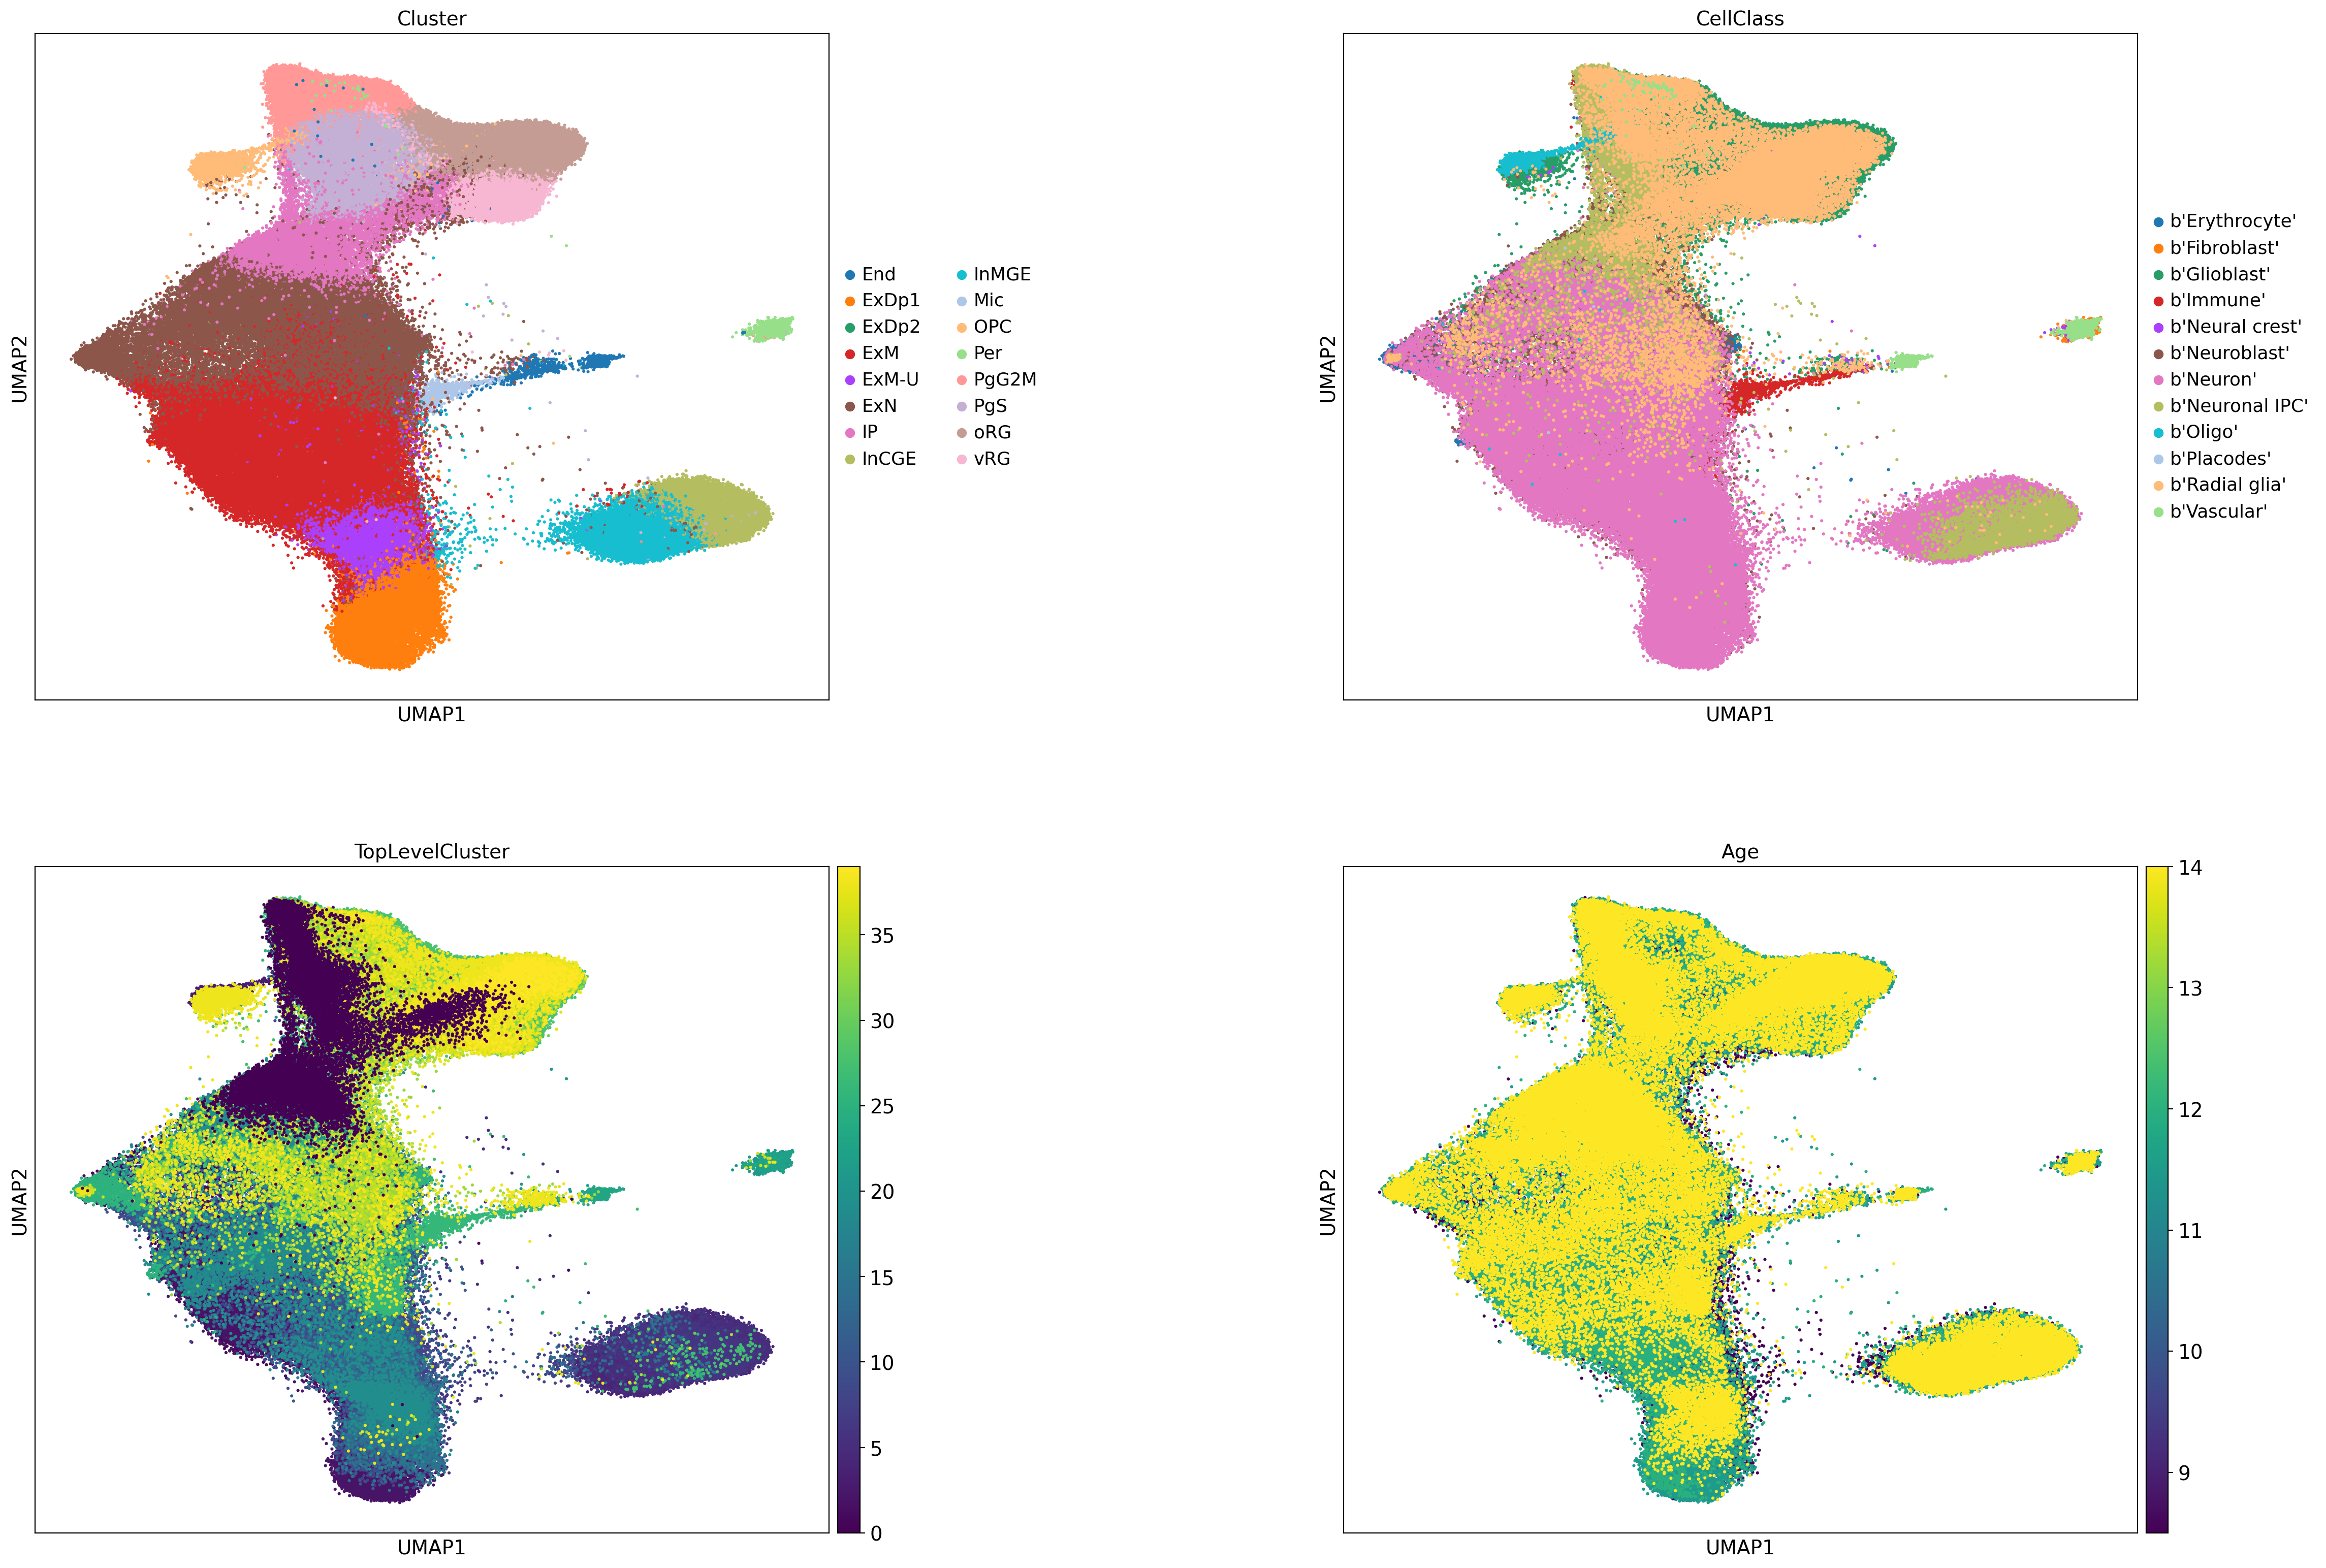

In [21]:
sc.pl.umap(adata1, color=["Cluster","CellClass","TopLevelCluster","Age"], size = 20, ncols=2, wspace=.5)

In [22]:
Linn.write(outDir+"/BraunIngested.h5ad")

In [23]:
pd.crosstab(Linn.obs.AggrRegion,Linn.obs.PoliudakisIngestedAnno)

PoliudakisIngestedAnno   End  ExDp1    ExM  ExM-U    ExN     IP  InCGE  InMGE  \
AggrRegion                                                                      
Forebrain               2083  14458  21429   2257  26280  20617  17575  20267   
Hindbrain                735   9398  21027   7325  21497   3661      0     83   
Midbrain                 683   4298   7614   1436  14019   1234      2    250   

PoliudakisIngestedAnno   Mic   OPC   Per  PgG2M    PgS    oRG   vRG  
AggrRegion                                                           
Forebrain               1384  2937  2965  16417  17637  30007  4249  
Hindbrain                608  2269  1720   2201   2521  12919  2240  
Midbrain                 457  2166  1869   1839   1590   7745  1742